In [37]:
import numpy as np
import pandas as pd
import geneselection.solvers.elasticnet.linear as elin
import geneselection.solvers.elasticnet.utils as eutils
import geneselection.datasets.scrnaseq_cardio_20181129 as cardio

<module 'geneselection.solvers.elasticnet.linear' from '/allen/aics/modeling/rorydm/projects/geneselection/geneselection/solvers/elasticnet/linear.py'>

In [26]:
params = dict(days = "all",                                    # list of days to use (or "all")
              X_noise = 0.01,                                  # gaussian noise added to scaled X
              y_noise = 0.5,                                   # gaussian noise added to scaled y
              day_offset = 0.1,                                # offest for close but similar days eg D24 vs D26
              lambda_path = np.geomspace(1.0, 0.01, num=100),  # lambda path
              alpha = 0.9,                                     # fraction of regularization devoted to L1 prenalty
              n_bootstraps = 100,                              # number of bootstrap replicates
              n_processes = 25,                                # number of parallel processes to use
              thresholds = np.linspace(0.01,1,num=100))        # selection thresholds for including genes

In [27]:
adata = cardio.load()
adata = eutils.preprocess_cardio(adata)
adata = eutils.subset_cardio(adata, days=params["days"])

In [38]:
boot_results = elin.parallel_runs(adata,
                                  n_processes=params["n_processes"],
                                  n_bootstraps=params["n_bootstraps"],
                                  X_noise=params["X_noise"],
                                  y_noise=params["y_noise"],
                                  alpha=params["alpha"],
                                  lambda_path=params["lambda_path"],
                                  day_offset=params["day_offset"])

/home/rorydm/anaconda3/envs/gsel/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/rorydm/anaconda3/envs/gsel/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/rorydm/anaconda3/envs/gsel/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/rorydm/anaconda3/envs/gsel/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: 

In [40]:
boot_results[3]["beta"]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

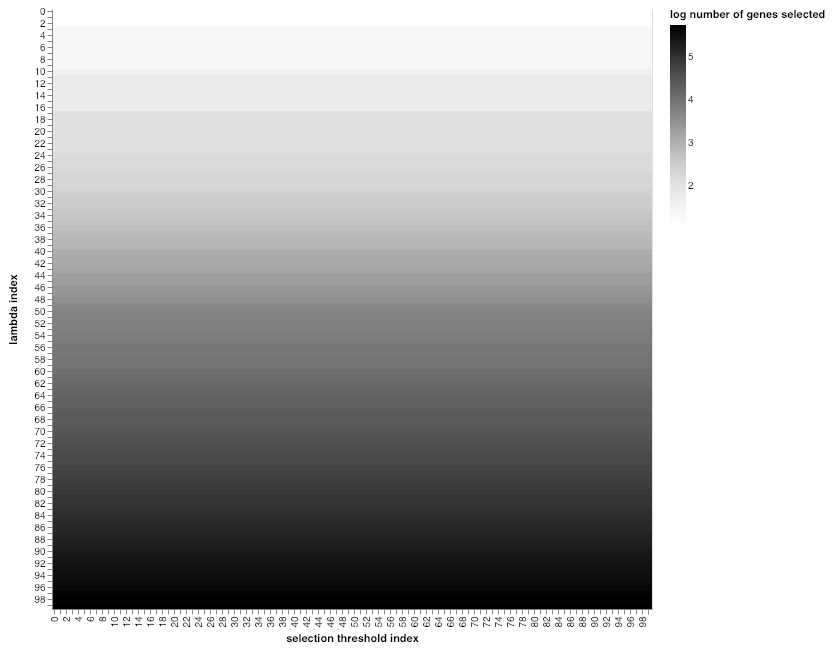

In [41]:
eutils.thresh_lambda_plot(boot_results,
                          adata,
                          thresholds=params["thresholds"],
                          lambdas=params["lambda_path"])

In [45]:
predictive_genes = eutils.get_selected_genes(boot_results,
                                             adata,
                                             lambda_index=65,
                                             selection_threshold_index=90,
                                             thresholds=params["thresholds"])

In [46]:
predictive_genes

array(['MT-CYB', 'CACNA1C', 'MYH6', 'SLC8A1', 'PALLD', 'CDH2', 'SC5D',
       'MT-CO1', 'INPP4B', 'COL2A1', 'ADAMTS12', 'FAM189A2', 'TRDN',
       'GRIN2A', 'MAML2', 'SORBS2', 'MYL4', 'IGF2BP1', 'PRKG1', 'MT-ND5',
       'PCDH9', 'KPNB1', 'HOMER1', 'MACF1', 'SERBP1', 'DAB1', 'ZBTB20',
       'MYOCD', 'FAM19A4', 'RORA', 'ATP1A1', 'NR6A1', 'PDK1', 'SAMD4A',
       'SLC16A1', 'FRAS1', 'LDLRAD4', 'HSPD1', 'HSD17B12', 'IGF2',
       'LAMA4', 'MDN1', 'FBXL7', 'FBN1', 'MT-ND1', 'PAM', 'SULF1',
       'HDAC9', 'EFNA5', 'SLC2A3', 'AKAP12', 'NAP1L1', 'NFIA', 'SLC39A10',
       'USP28', 'COL3A1', 'UBE4B', 'SDK1', 'MEF2C', 'MT-ND4L', 'PHF21B',
       'TRIM55', 'PIP4K2A', 'NES', 'TRPM3', 'MT-ATP8', 'TIMP3', 'LIN28B',
       'CTSC', 'MARCH1', 'NCKAP5', 'FGF12', 'LIN28A', 'L1TD1', 'DPPA4'],
      dtype='<U14')